In [58]:
!pip install -q yfinance
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for using np.pi


In [62]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define tech_list with the names of the stocks you want to access
tech_list = ['AAPL', 'MSFT', 'GOOGL']

# Set up date range
end = datetime.now() - timedelta(days=1)
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data directly
data_dict = {}
for stock in tech_list:
    data_dict[stock] = yf.download(stock, start=start, end=end)

# Print the fetched data for each stock
for stock in tech_list:
    print(f"{stock} data:")
    print(data_dict[stock].head())

# Add company names and concatenate data
company_name = ['Apple Inc.', 'Microsoft Corp.', 'Alphabet Inc.']
for stock, name in zip(tech_list, company_name):
    data_dict[stock]["company_name"] = name

df = pd.concat(data_dict.values(), axis=0).reset_index()  # Reset index after concatenation
print(df.tail(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL data:
Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2024-01-04 00:00:00+00:00  181.023178  181.910004  183.089996  180.880005   
2024-01-05 00:00:00+00:00  180.296707  181.179993  182.759995  180.169998   
2024-01-08 00:00:00+00:00  184.655365  185.559998  185.600006  181.500000   
2024-01-09 00:00:00+00:00  184.237411  185.139999  185.149994  182.729996   
2024-01-10 00:00:00+00:00  185.282318  186.190002  186.399994  183.919998   

Price                            Open    Volume  
Ticker                           AAPL      AAPL  
Date                                             
2024-01-04 00:00:00+00:00  182.149994  71983600  
2024-01-05 00:00:00+00:00  181.990005  62303300  
2024-01-08 00:00:00+00:00  182.089996  59144500  
2024-01-09 00:00:00+00:00  183.919998  42841800  
2024-01-10 00:00:00+00

In [64]:
df.to_csv("stock_data.csv", index=False)


In [66]:
# Obtain descriptive statistics
descriptive_stats = df.describe()

# Print the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    207.242784  207.671468  209.382381  205.678294  207.432182   
std      25.840868   25.627914   25.724842   25.267125   25.499208   
min     164.405121  165.000000  166.399994  164.080002  165.350006   
25%     183.497284  184.314995  185.134995  182.204998  183.827499   
50%     215.917458  216.280006  217.364998  212.535004  215.245003   
75%     227.277451  227.555004  229.462498  225.420002  227.817493   
max     259.019989  259.019989  260.100006  257.630005  258.190002   

Price         Volume   Adj Close       Close        High         Low  \
Ticker          AAPL        MSFT        MSFT        MSFT        MSFT   
count   2.520000e+02  252.000000  252.000000  252.000000  252.000000   
mean    5.694884e+07  419.904915  420.710952  424.033453  4

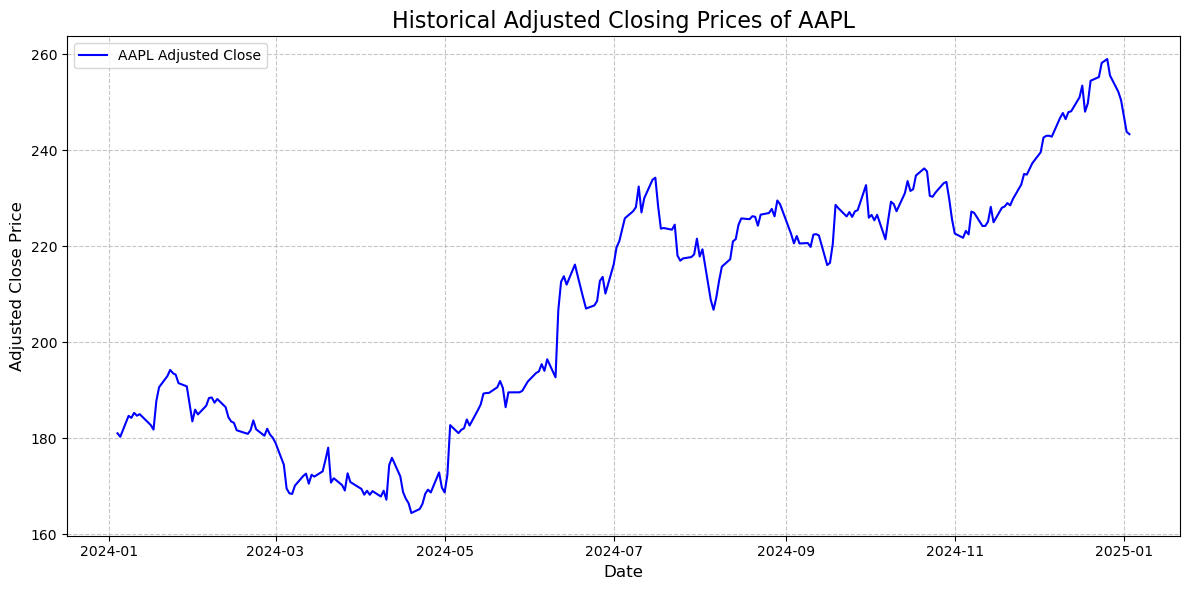

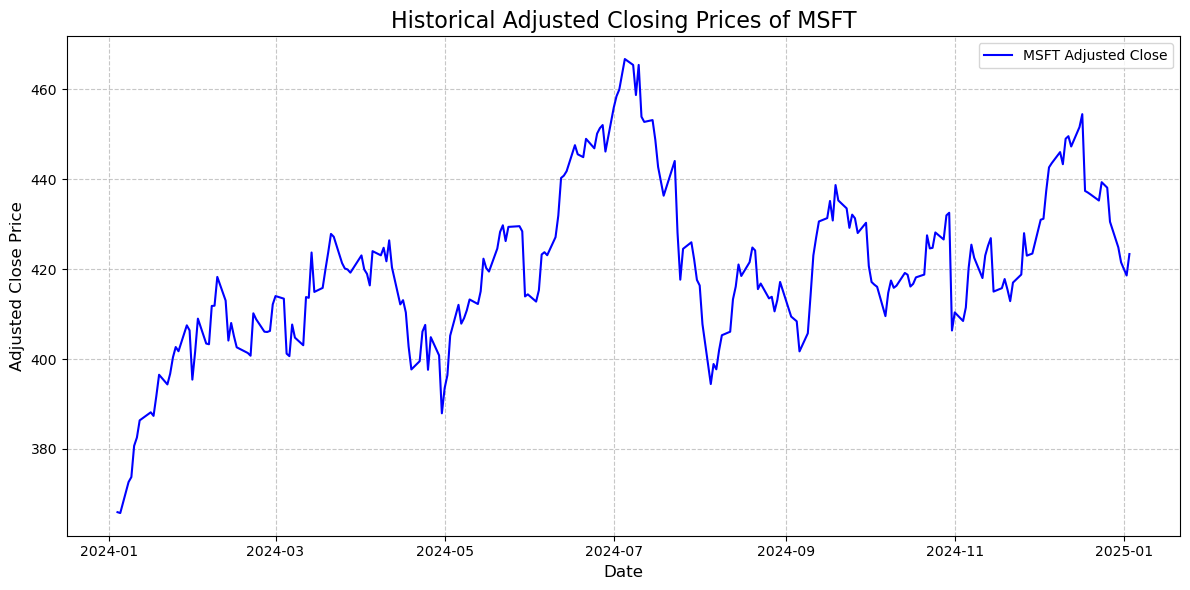

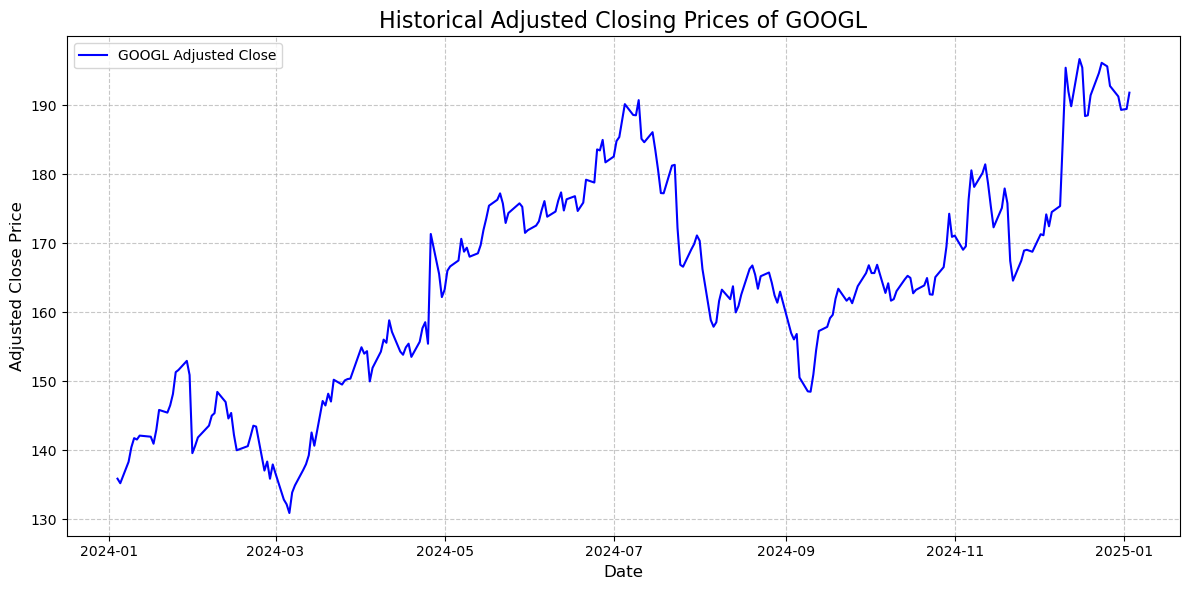

In [68]:
# Generate individual plots for each company closing price
for stock in tech_list:
    plt.figure(figsize=(12, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Adj Close'], label=f'{stock} Adjusted Close', color='blue')
    plt.title(f'Historical Adjusted Closing Prices of {stock}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Adjusted Close Price', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

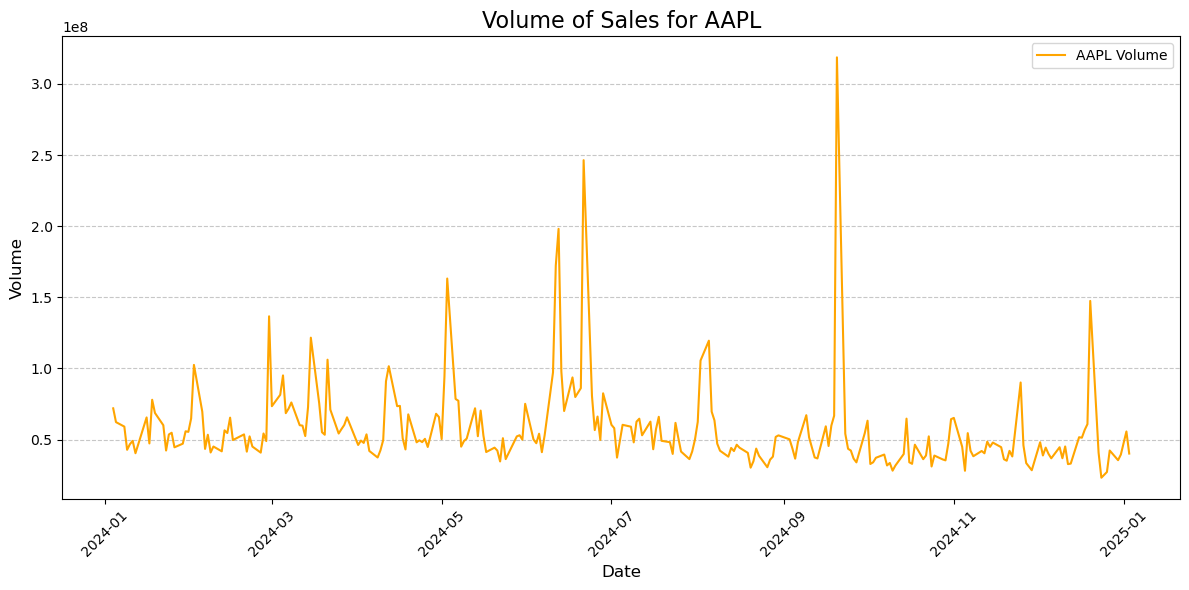

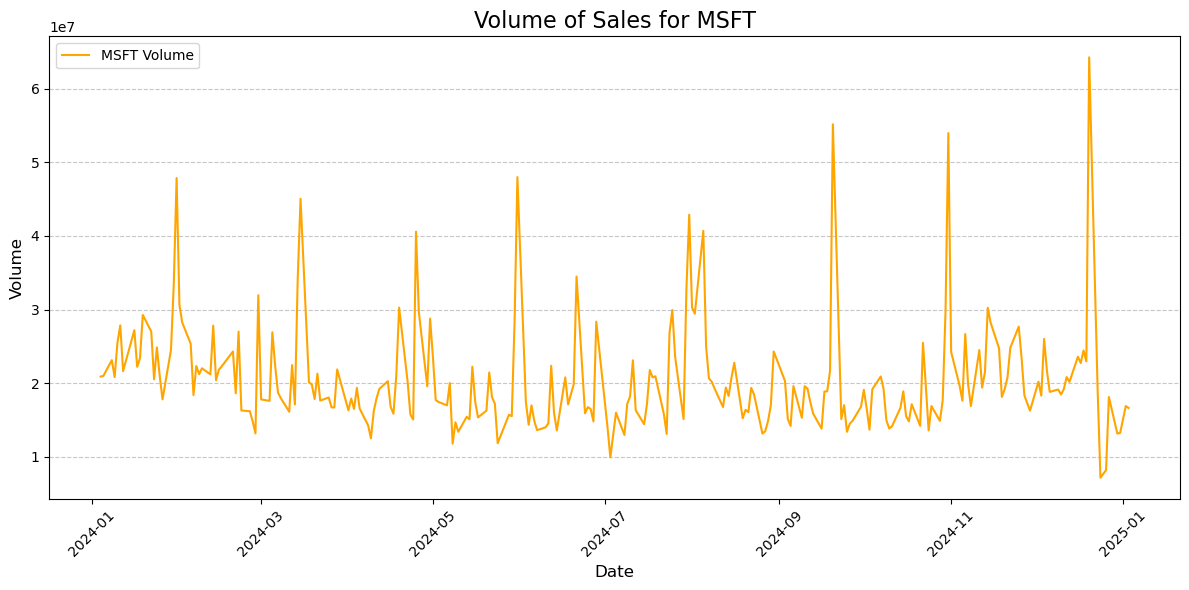

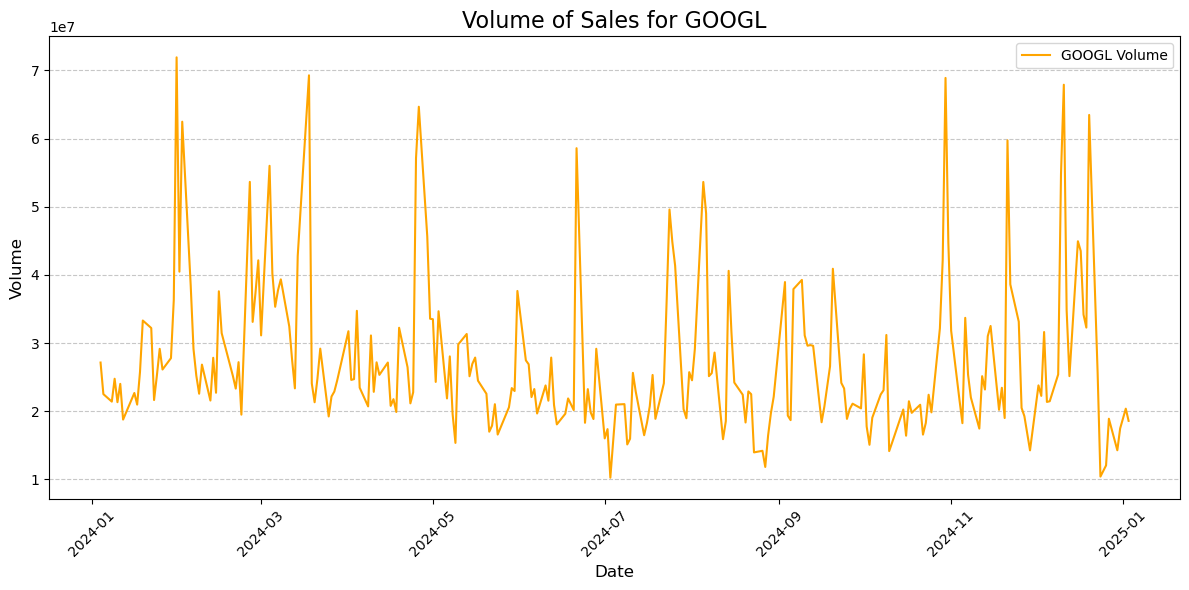

In [70]:

# Plot Volume of Sales for each company
for stock in tech_list:
    plt.figure(figsize=(12, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Volume'], label=f'{stock} Volume', color='orange')
    plt.title(f'Volume of Sales for {stock}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Volume', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
   

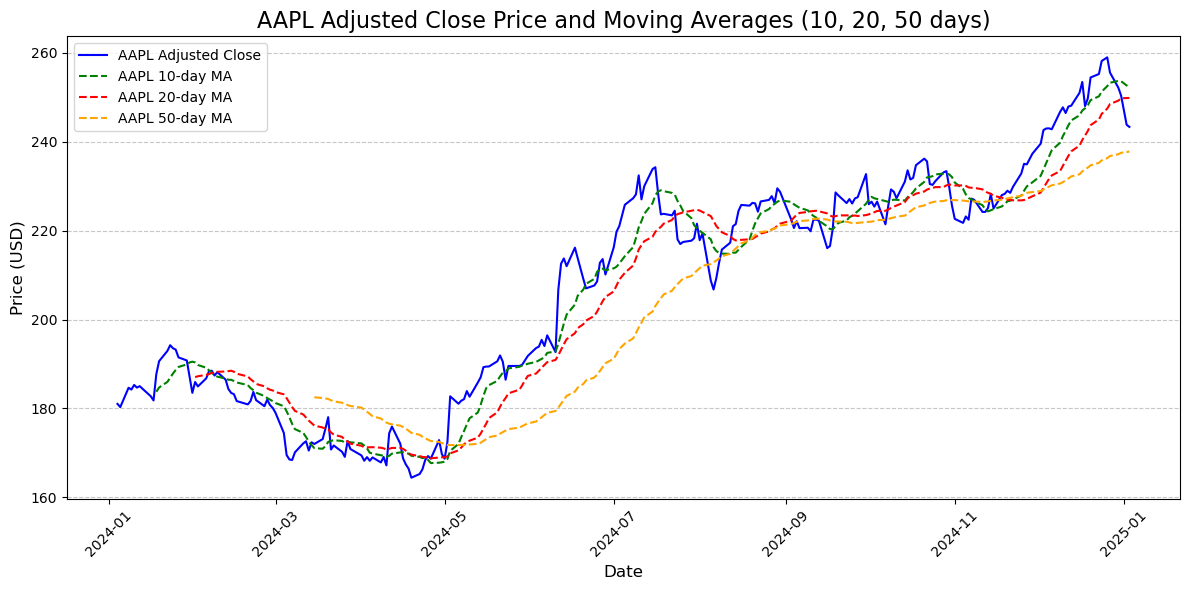

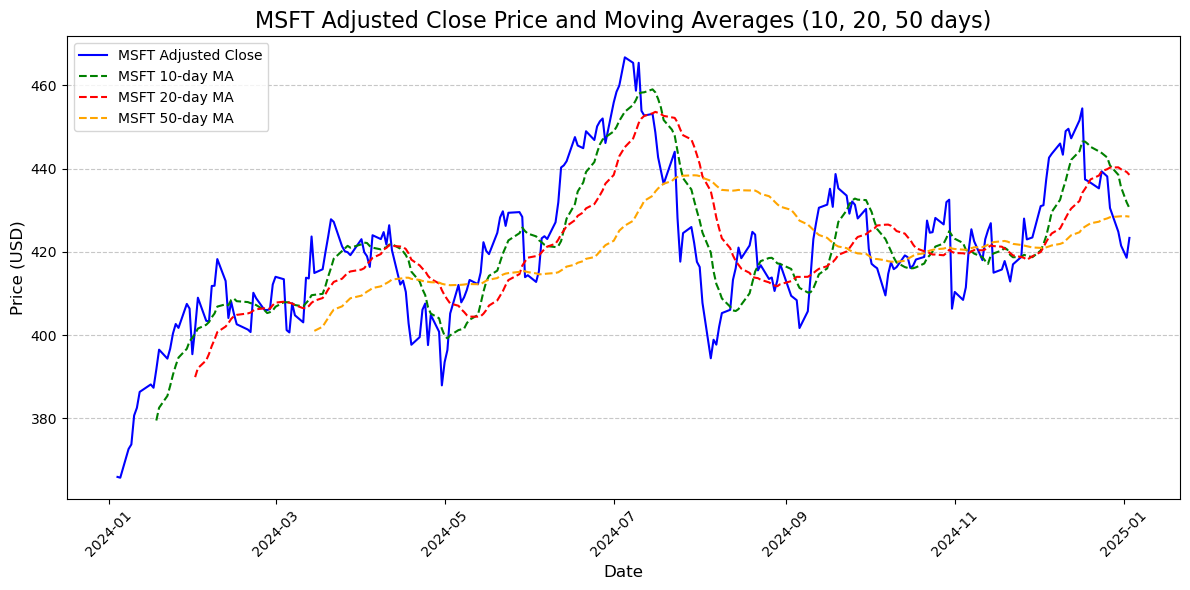

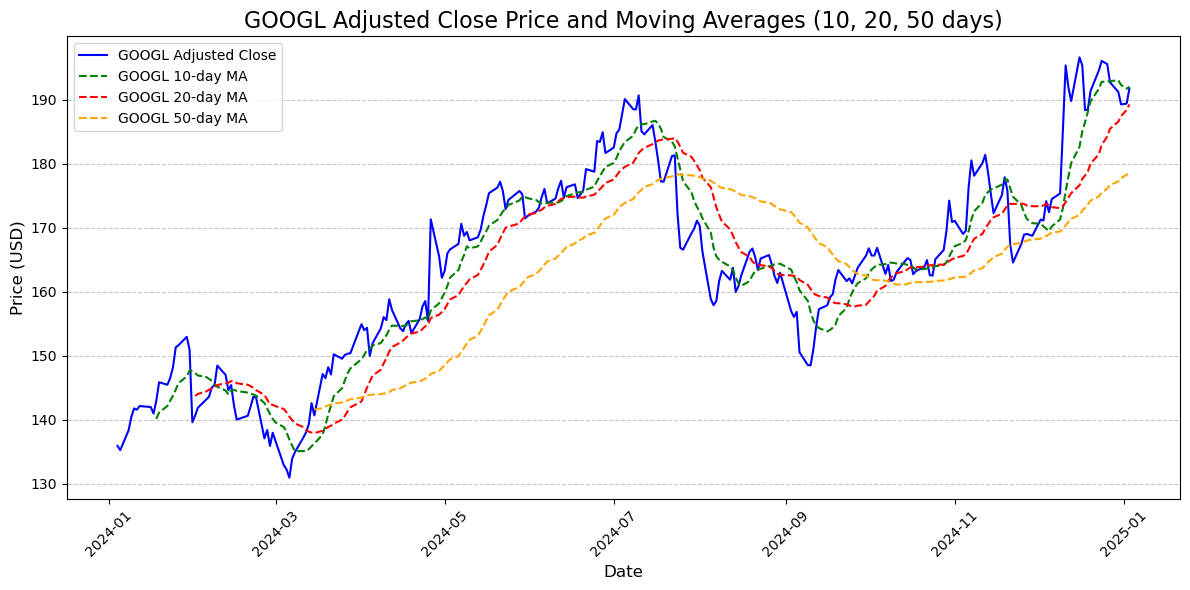

In [72]:

# Plot moving averages for 10, 20, and 50 days for each stock
for stock in tech_list:
    # Calculate moving averages for 10, 20, and 50 days
    data_dict[stock]['10_day_MA'] = data_dict[stock]['Adj Close'].rolling(window=10).mean()
    data_dict[stock]['20_day_MA'] = data_dict[stock]['Adj Close'].rolling(window=20).mean()
    data_dict[stock]['50_day_MA'] = data_dict[stock]['Adj Close'].rolling(window=50).mean()
    
    # Plot the moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Adj Close'], label=f'{stock} Adjusted Close', color='blue')
    plt.plot(data_dict[stock].index, data_dict[stock]['10_day_MA'], label=f'{stock} 10-day MA', color='green', linestyle='--')
    plt.plot(data_dict[stock].index, data_dict[stock]['20_day_MA'], label=f'{stock} 20-day MA', color='red', linestyle='--')
    plt.plot(data_dict[stock].index, data_dict[stock]['50_day_MA'], label=f'{stock} 50-day MA', color='orange', linestyle='--')
    
    plt.title(f'{stock} Adjusted Close Price and Moving Averages (10, 20, 50 days)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


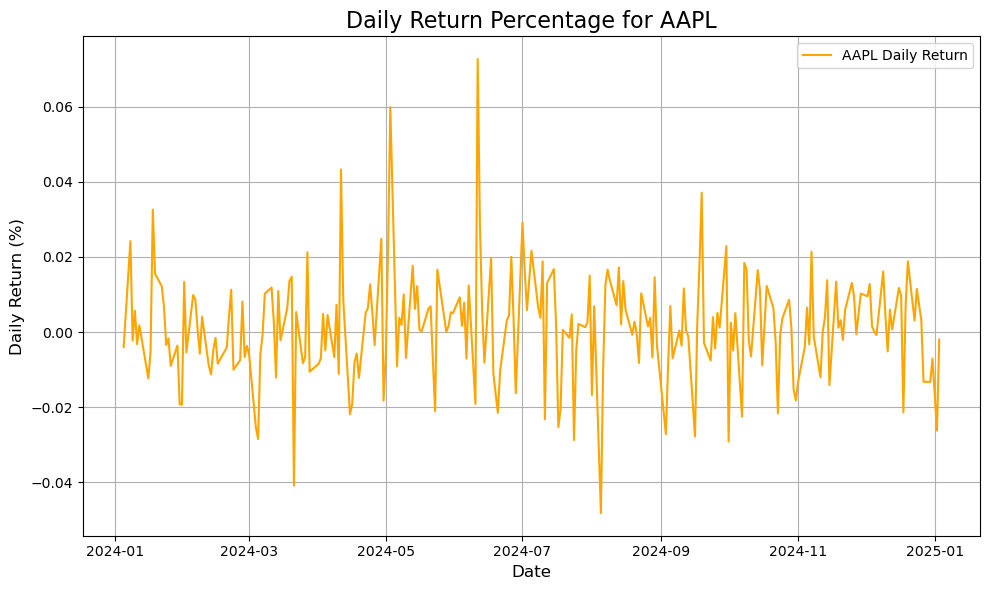

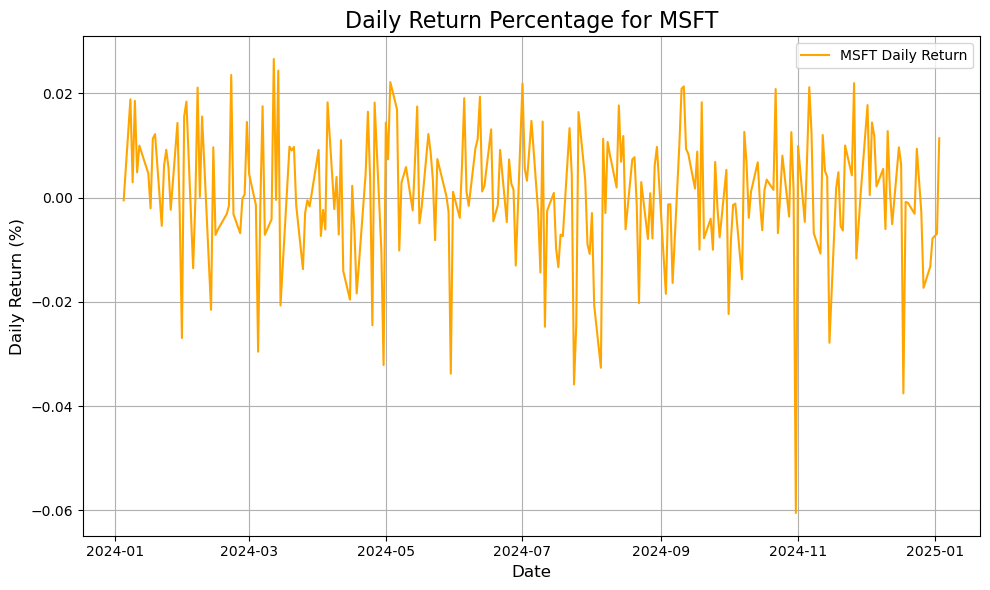

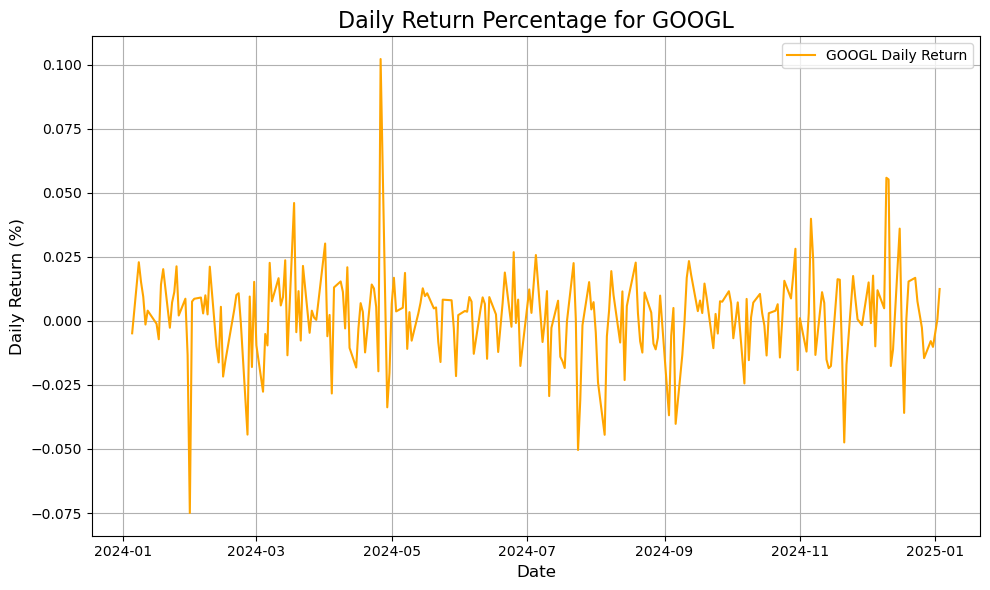

In [74]:
# Calculate the daily returns for each stock
for stock in tech_list:
    data_dict[stock]['Daily Return'] = data_dict[stock]['Adj Close'].pct_change()  # Daily percentage change
    
    # Plot the daily returns
    plt.figure(figsize=(10, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Daily Return'], label=f'{stock} Daily Return', color='orange')
    plt.title(f"Daily Return Percentage for {stock}", fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Daily Return (%)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


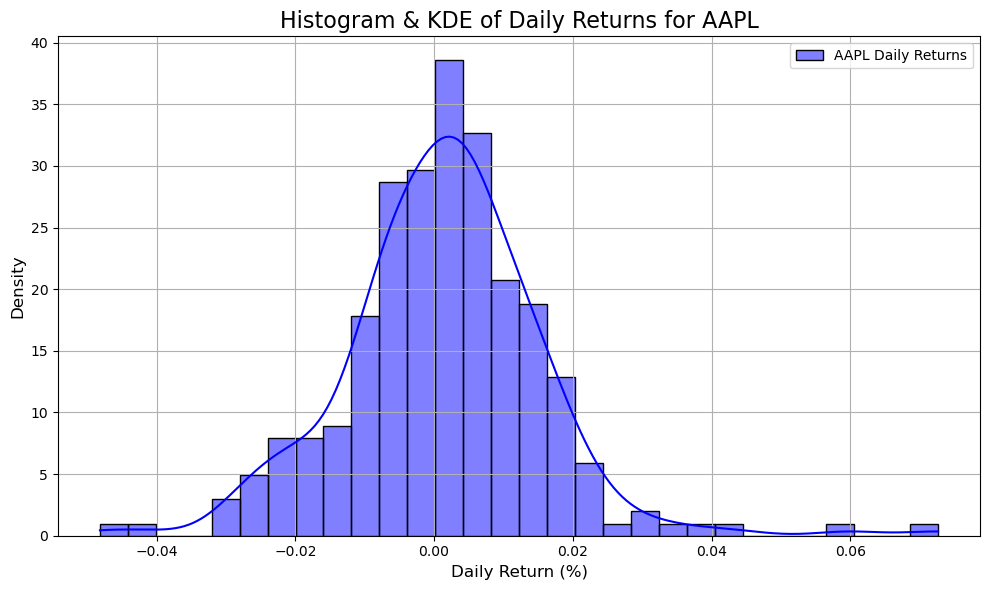

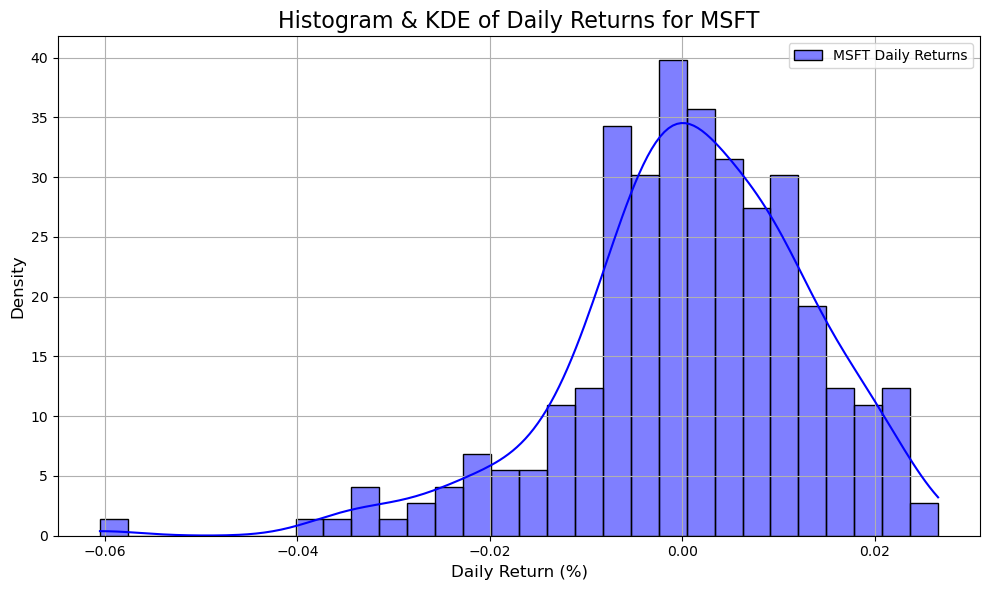

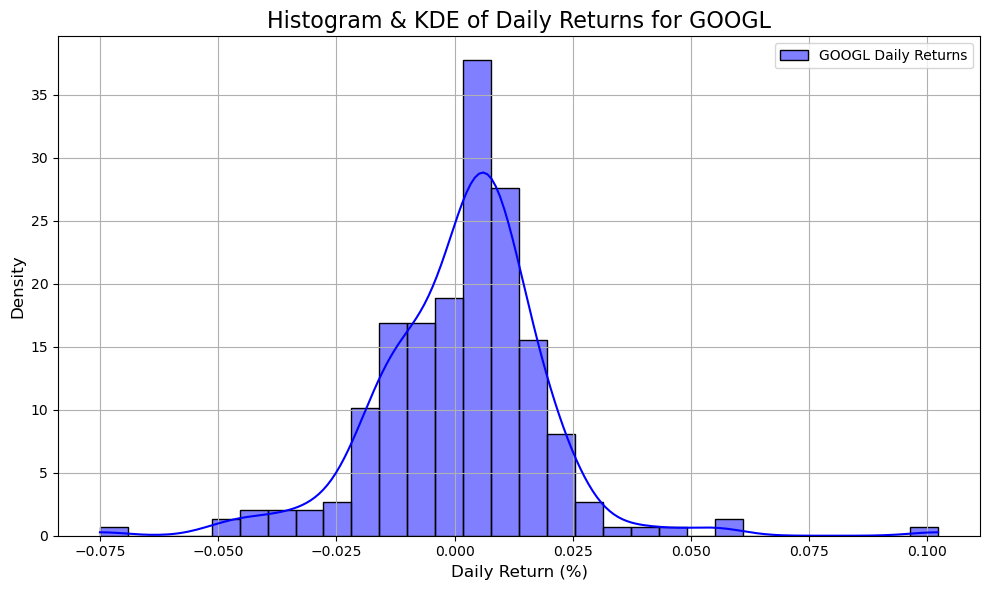

In [76]:

# Plot histograms and KDE for each company's daily returns
for stock in tech_list:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram and KDE
    sns.histplot(data_dict[stock]['Daily Return'].dropna(), kde=True, bins=30, color='blue', edgecolor='black', stat="density", label=f'{stock} Daily Returns')
    
    # Add title and labels
    plt.title(f"Histogram & KDE of Daily Returns for {stock}", fontsize=16)
    plt.xlabel("Daily Return (%)", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


                                 AAPL        MSFT       GOOGL
Date                                                         
2024-01-04 00:00:00+00:00  181.910004  367.940002  136.389999
2024-01-05 00:00:00+00:00  181.179993  367.750000  135.729996
2024-01-08 00:00:00+00:00  185.559998  374.690002  138.839996
2024-01-09 00:00:00+00:00  185.139999  375.790009  140.949997
2024-01-10 00:00:00+00:00  186.190002  382.769989  142.279999
Correlation Matrix of Closing Prices:
           AAPL      MSFT     GOOGL
AAPL   1.000000  0.508873  0.679964
MSFT   0.508873  1.000000  0.714264
GOOGL  0.679964  0.714264  1.000000


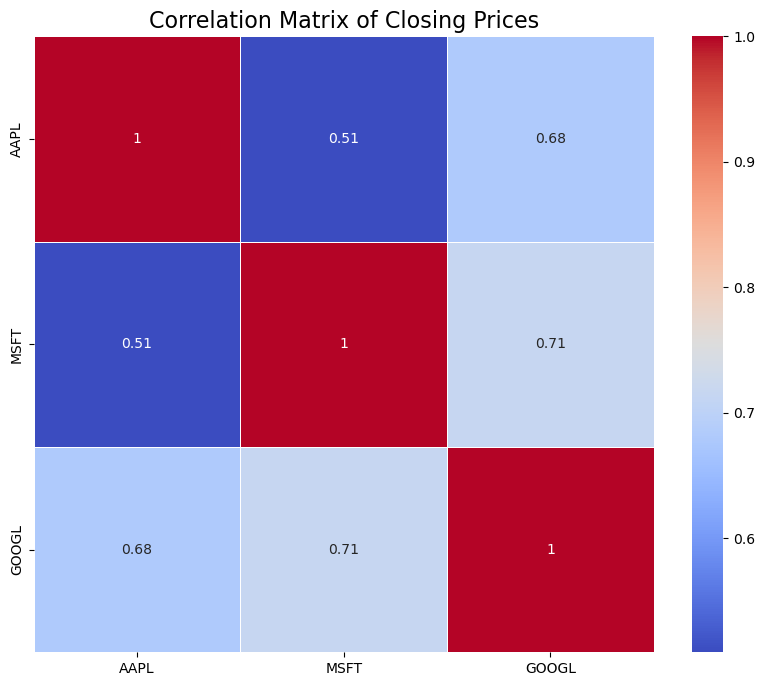

In [78]:
# Create a DataFrame with the 'Close' columns for each stock
close_prices = pd.concat({stock: data_dict[stock]['Close'] for stock in tech_list}, axis=1, join='inner')

# Rename the columns to the stock symbols (for clarity)
close_prices.columns = tech_list

# Display the first few rows of the combined DataFrame
print(close_prices.head())

# Calculate the correlation matrix of the closing prices
correlation_matrix = close_prices.corr()

# Print the correlation matrix
print("Correlation Matrix of Closing Prices:")
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Closing Prices", fontsize=16)
plt.show()


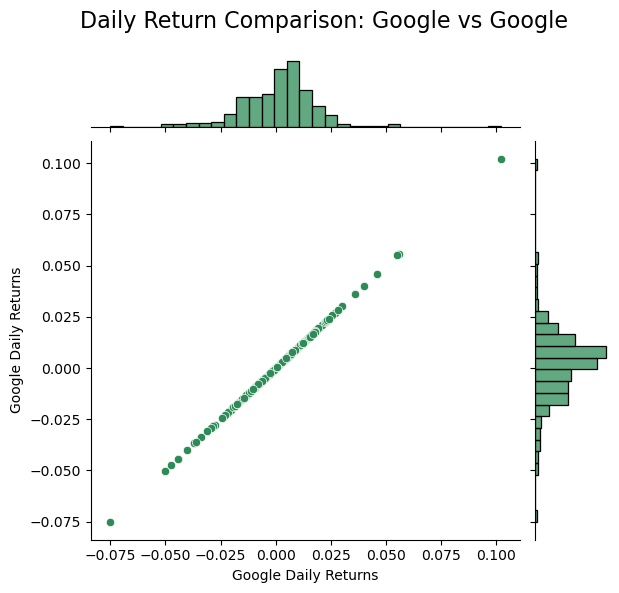

In [147]:
# Plot the relationship between Google's daily returns and itself
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_rets, kind='scatter', color='seagreen')

# Add a title for the plot
plt.subplots_adjust(top=0.9)
plt.suptitle("Daily Return Comparison: Google vs Google", fontsize=16)
plt.xlabel("Google Daily Returns")
plt.ylabel("Google Daily Returns")
plt.show()


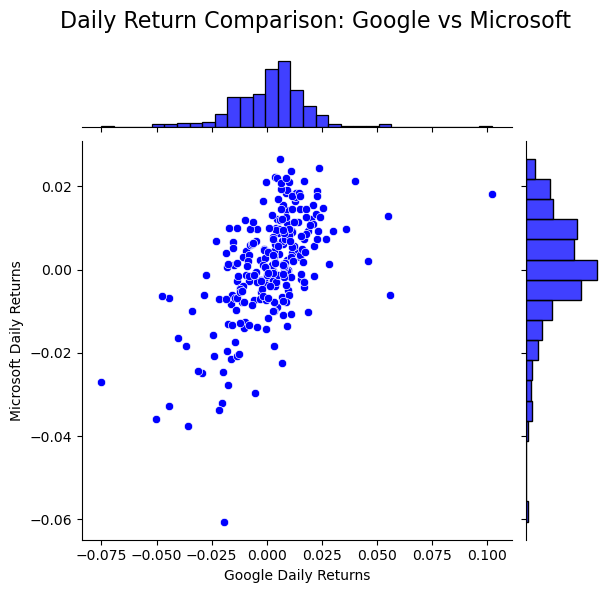

In [82]:


# Create a DataFrame with the daily returns for all stocks
tech_rets = pd.DataFrame({stock: data_dict[stock]['Daily Return'] for stock in tech_list})

# Drop NaN values that may arise from the first row's pct_change()
tech_rets.dropna(inplace=True)

# Plot the relationship between Google and Microsoft daily returns
sns.jointplot(x='GOOGL', y='MSFT', data=tech_rets, kind='scatter', color='blue')

# Add titles and adjust labels
plt.subplots_adjust(top=0.9)
plt.suptitle("Daily Return Comparison: Google vs Microsoft", fontsize=16)
plt.xlabel("Google Daily Returns")
plt.ylabel("Microsoft Daily Returns")
plt.show()


                               AAPL      MSFT     GOOGL
Date                                                   
2024-01-04 00:00:00+00:00       NaN       NaN       NaN
2024-01-05 00:00:00+00:00 -0.004013 -0.000516 -0.004839
2024-01-08 00:00:00+00:00  0.024175  0.018872  0.022913
2024-01-09 00:00:00+00:00 -0.002263  0.002936  0.015198
2024-01-10 00:00:00+00:00  0.005672  0.018574  0.009436


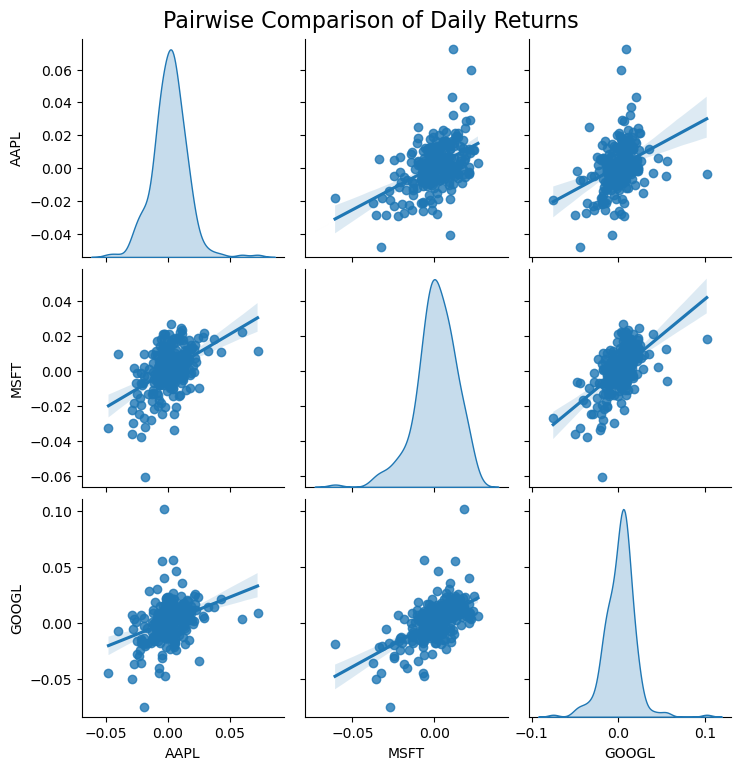

In [84]:
# Ensure daily returns (tech_rets) are calculated for each stock
tech_rets = pd.DataFrame({stock: data_dict[stock]['Daily Return'] for stock in tech_list})

# Display the first few rows of the daily returns DataFrame
print(tech_rets.head())

# Use pairplot to visualize the relationships between all stock returns
sns.pairplot(tech_rets, kind='reg', diag_kind='kde', height=2.5)

# Add a title to the pairplot
plt.suptitle("Pairwise Comparison of Daily Returns", y=1.02, fontsize=16)
plt.show()

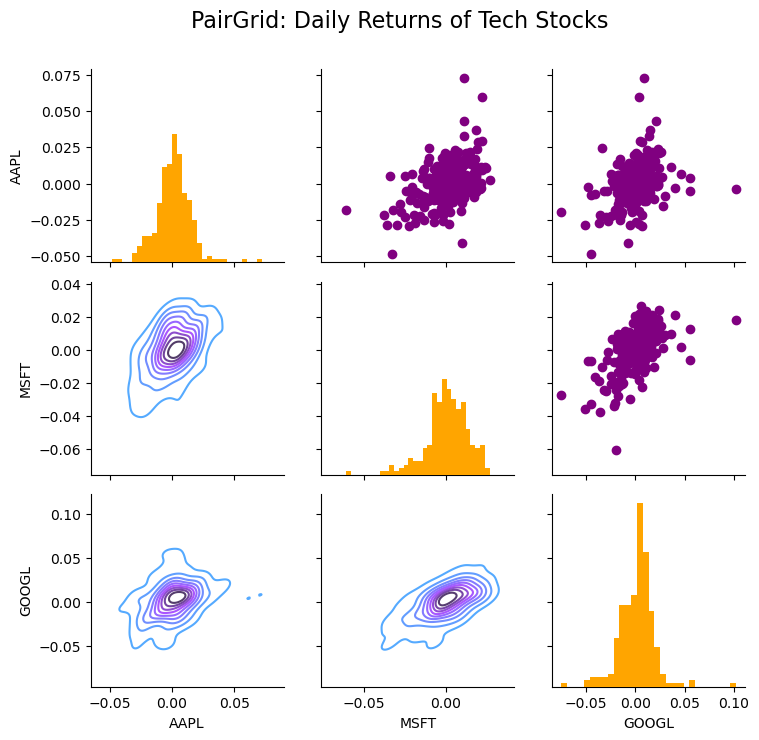

In [85]:
# Set up the PairGrid for daily returns
return_fig = sns.PairGrid(tech_rets.dropna())  # Drop NaN values to avoid issues in plotting

# Map a scatter plot to the upper triangle
return_fig.map_upper(plt.scatter, color='purple')

# Map a KDE plot to the lower triangle with a cool colormap
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Map histograms to the diagonal
return_fig.map_diag(plt.hist, bins=30, color='orange')

# Add a title to the PairGrid
plt.subplots_adjust(top=0.9)
return_fig.fig.suptitle("PairGrid: Daily Returns of Tech Stocks", fontsize=16)

# Show the plot
plt.show()

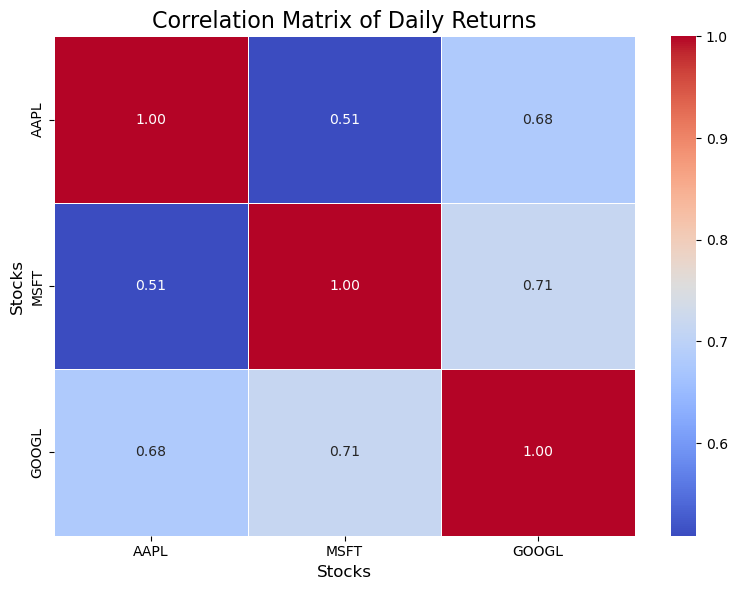

In [87]:

# Set up the figure
plt.figure(figsize=(8, 6))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix of Daily Returns", fontsize=16)
plt.xlabel("Stocks", fontsize=12)
plt.ylabel("Stocks", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


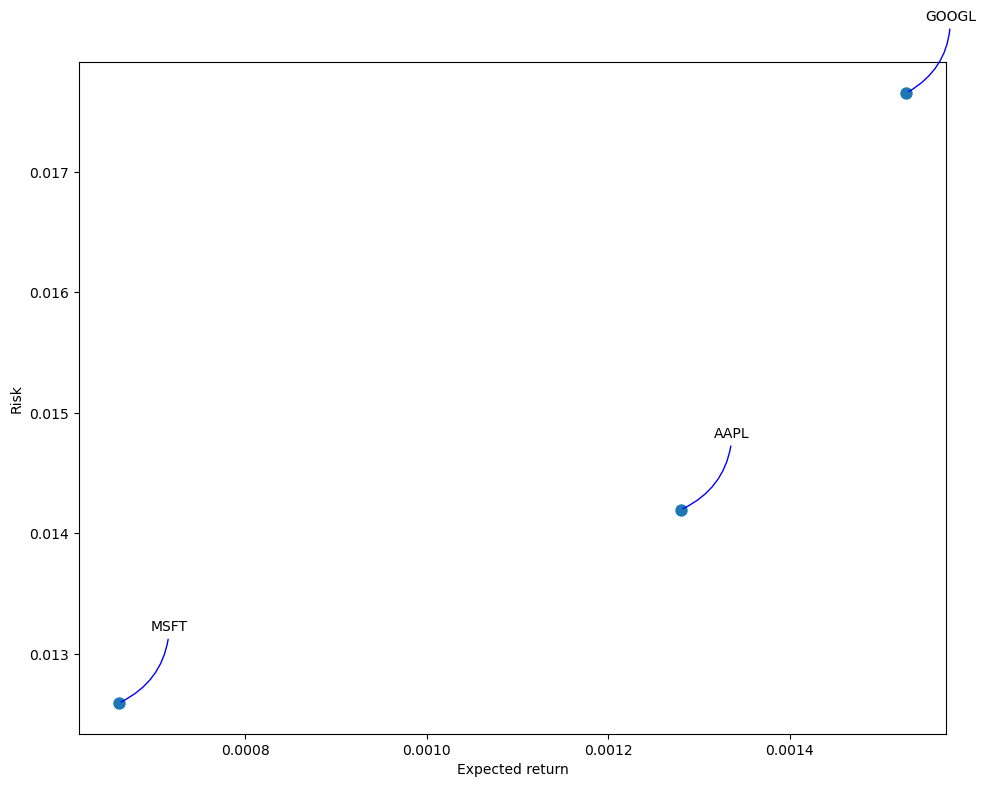

In [89]:


# Clean the data by dropping rows with NaN values
rets = tech_rets.dropna()

# Set the area size for each marker
area = np.pi * 20

# Create the figure with a size of 10x8
plt.figure(figsize=(10, 8))

# Plot the mean vs. standard deviation for each stock
plt.scatter(rets.mean(), rets.std(), s=area)

# Label the axes
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate each point with the stock symbol and add an arrow
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Show the plot
plt.tight_layout()
plt.show()


In [92]:


# Fetch historical stock data for Apple (AAPL)
data = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Show the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2012-01-03 00:00:00+00:00  12.388994  14.686786  14.732143  14.607143   
2012-01-04 00:00:00+00:00  12.455576  14.765714  14.810000  14.617143   
2012-01-05 00:00:00+00:00  12.593859  14.929643  14.948214  14.738214   
2012-01-06 00:00:00+00:00  12.725513  15.085714  15.098214  14.972143   
2012-01-09 00:00:00+00:00  12.705327  15.061786  15.276786  15.048214   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2012-01-03 00:00:00+00:00  14.621429  302220800  
2012-01-04 00:00:00+00:00  14.642857  260022000  
2012-01-05 00:00:00+00:00  14.819643  271269600  
2012-01-06 00:00:00+00:00  14.991786  318292800  
2012-01-09 00:00:00+00:00  15.196429  394024400  


[*********************100%***********************]  1 of 1 completed


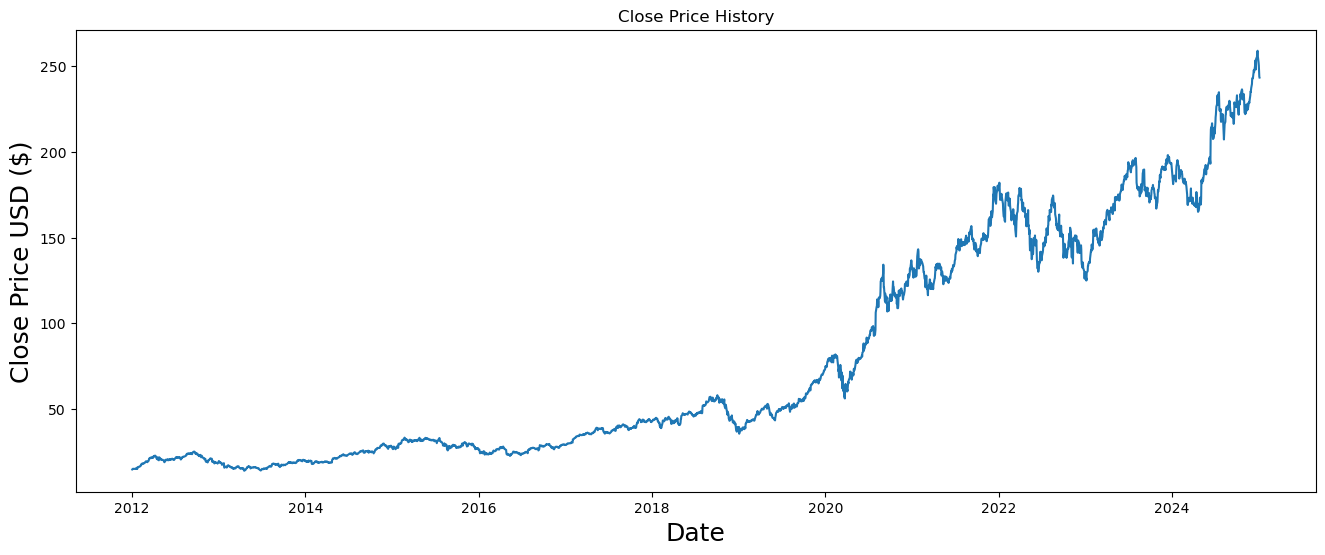

In [94]:
# Fetch historical stock data for Apple (AAPL)
df = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Plot the closing price history
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [96]:

# Fetch historical stock data for Apple (AAPL)
df = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (95% of the dataset)
training_data_len = int(np.ceil(len(dataset) * .95))

# Display the training data length
print("Training Data Length: ", training_data_len)

[*********************100%***********************]  1 of 1 completed

Training Data Length:  3109


In [113]:
print("Dataset Shape: ", dataset.shape)  # Check dimensions
print("First 5 Rows:\n", dataset[:5])   # Display the first 5 rows


Dataset Shape:  (757, 20)
First 5 Rows:
                        Date   Adj Close       Close        High         Low  \
0                       NaT  207.242784  207.671468  209.382381  205.678294   
1 2024-01-04 00:00:00+00:00  181.023178  181.910004  183.089996  180.880005   
2 2024-01-05 00:00:00+00:00  180.296707  181.179993  182.759995  180.169998   
3 2024-01-08 00:00:00+00:00  184.655365  185.559998  185.600006  181.500000   
4 2024-01-09 00:00:00+00:00  184.237411  185.139999  185.149994  182.729996   

         Open        Volume company_name  Adj Close.1     Close.1      High.1  \
0  207.432182  5.694884e+07          NaN   419.904915  420.710952  424.033453   
1  182.149994  7.198360e+07   Apple Inc.   419.904915  420.710952  424.033453   
2  181.990005  6.230330e+07   Apple Inc.   419.904915  420.710952  424.033453   
3  182.089996  5.914450e+07   Apple Inc.   419.904915  420.710952  424.033453   
4  183.919998  4.284180e+07   Apple Inc.   419.904915  420.710952  424.033453  

In [115]:
print(dataset.shape)


(757, 20)


In [117]:
import pandas as pd

dataset = pd.read_csv('stock_data.csv')
print(dataset.shape)  # Ensure it's not (0, n)


(757, 20)


In [119]:
print(dataset.dtypes)  # Display the data type of each column


Date            object
Adj Close       object
Close           object
High            object
Low             object
Open            object
Volume          object
company_name    object
Adj Close.1     object
Close.1         object
High.1          object
Low.1           object
Open.1          object
Volume.1        object
Adj Close.2     object
Close.2         object
High.2          object
Low.2           object
Open.2          object
Volume.2        object
dtype: object


In [121]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
dataset = pd.read_csv('stock_data.csv')

# Convert the 'Date' column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# List of numeric columns
numeric_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
                   'Adj Close.1', 'Close.1', 'High.1', 'Low.1', 'Open.1', 'Volume.1',
                   'Adj Close.2', 'Close.2', 'High.2', 'Low.2', 'Open.2', 'Volume.2']

# Convert numeric columns to numeric (coerce non-numeric to NaN)
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling NaNs with the mean of each numeric column
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to the numeric columns
scaled_data = scaler.fit_transform(dataset[numeric_columns])

# Print the shape of the scaled data
print(scaled_data.shape)


(757, 18)


In [123]:
print(scaled_data[:5])  # To see the first 5 rows of the scaled data


[[0.45275827 0.45385528 0.45872339 0.44466372 0.45327637 0.11411301
  0.53634816 0.53061771 0.53975959 0.51637456 0.52867399 0.23405888
  0.50057685 0.50293213 0.47856744 0.49581459 0.49359988 0.27853581]
 [0.17563896 0.17985541 0.17812167 0.17958314 0.18095636 0.1650015
  0.53634816 0.53061771 0.53975959 0.51637456 0.52867399 0.23405888
  0.50057685 0.50293213 0.47856744 0.49581459 0.49359988 0.27853581]
 [0.16796077 0.17209099 0.17459977 0.17199354 0.17923309 0.13223637
  0.53634816 0.53061771 0.53975959 0.51637456 0.52867399 0.23405888
  0.50057685 0.50293213 0.47856744 0.49581459 0.49359988 0.27853581]
 [0.21402814 0.21867688 0.20490939 0.18621056 0.18031011 0.12154471
  0.53634816 0.53061771 0.53975959 0.51637456 0.52867399 0.23405888
  0.50057685 0.50293213 0.47856744 0.49581459 0.49359988 0.27853581]
 [0.20961072 0.21420976 0.2001067  0.19935856 0.20002146 0.06636459
  0.53634816 0.53061771 0.53975959 0.51637456 0.52867399 0.23405888
  0.50057685 0.50293213 0.47856744 0.49581459

In [149]:
# Load the data
data = pd.read_csv('stock_data.csv')

# Print the shape of the data
print(data.shape)

# Print the first few rows to inspect the data
print(data.head())

# Check column names
print(data.columns)


(757, 20)
                        Date           Adj Close               Close  \
0                        NaN                AAPL                AAPL   
1  2024-01-04 00:00:00+00:00  181.02316284179688  181.91000366210938   
2  2024-01-05 00:00:00+00:00   180.2967071533203  181.17999267578125   
3  2024-01-08 00:00:00+00:00  184.65536499023438  185.55999755859375   
4  2024-01-09 00:00:00+00:00  184.23741149902344  185.13999938964844   

                 High                 Low                Open      Volume  \
0                AAPL                AAPL                AAPL        AAPL   
1  183.08999633789062   180.8800048828125  182.14999389648438  71983600.0   
2  182.75999450683594   180.1699981689453  181.99000549316406  62303300.0   
3  185.60000610351562               181.5  182.08999633789062  59144500.0   
4  185.14999389648438  182.72999572753906   183.9199981689453  42841800.0   

  company_name Adj Close.1 Close.1 High.1 Low.1 Open.1 Volume.1 Adj Close.2  \
0          NaN 

In [139]:
print(len(data))
print(training_data_len)


3272
3109


In [194]:
print(data.shape)


(252, 20)


In [196]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Check if the 'Adj Close' column contains non-numeric values
# Remove any rows where 'Adj Close' is not numeric (e.g., NaN, string values like 'AAPL')
data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce')

# Drop rows with NaN values (in case there were invalid values converted to NaN)
data = data.dropna(subset=['Adj Close'])

# Set the training length
training_data_len = int(np.ceil(len(data) * 0.8))  # 80% training, 20% testing

# Fit the MinMaxScaler to the 'Adj Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))  # Use the 'Adj Close' column

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):  # Use 60 previous time steps for each prediction
    x_train.append(train_data[i-60:i, 0])  # x_train is the previous 60 values
    y_train.append(train_data[i, 0])      # y_train is the next value

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM model (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data['Adj Close'].values[training_data_len:]  # Use actual values from 'Adj Close' as y_test

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the x_test to numpy array
x_test = np.array(x_test)

# Reshape the test data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions using the fitted scaler
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error (RMSE): {rmse}')


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0292
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Root Mean Squared Error (RMSE): 14.355426252170492


In [205]:
# Create the test data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []

# Prepare the input data for the test set
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the x_test to numpy array
x_test = np.array(x_test)

# Reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Align the predictions with the 'valid' DataFrame
valid = data[training_data_len:].copy()  # Explicitly create a copy of the 'valid' DataFrame
valid.loc[:, 'Predictions'] = predictions[:len(valid)]  # Ensure alignment with the 'valid' DataFrame


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


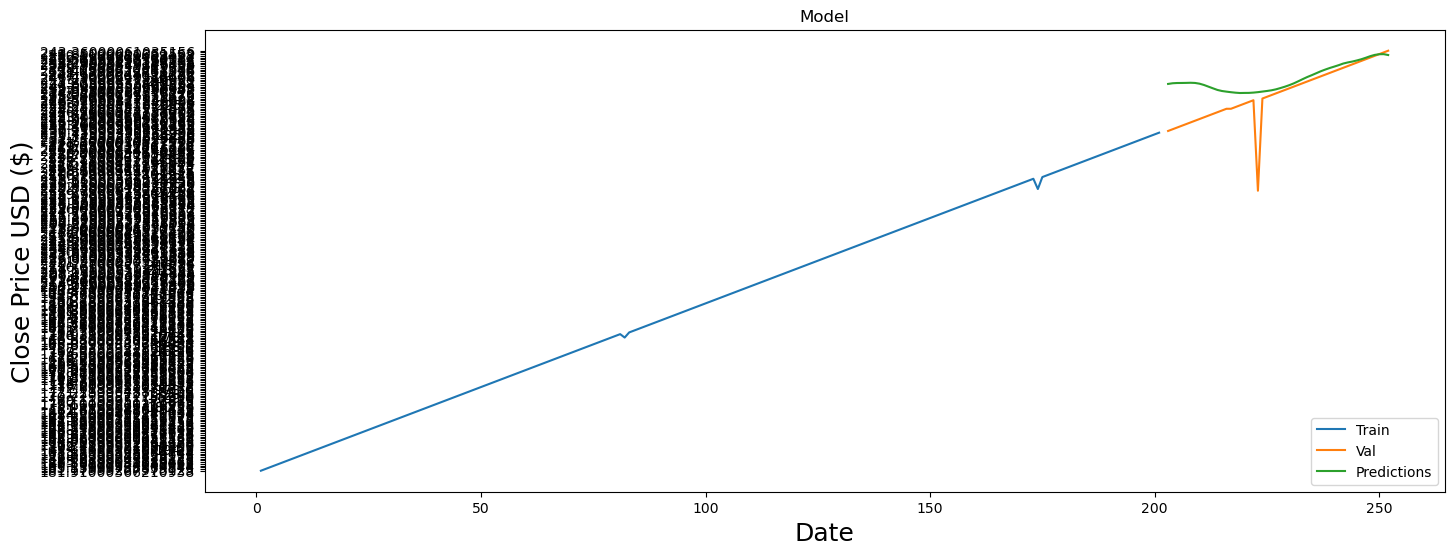

In [207]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot training data, validation data, and predictions
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')

plt.legend(loc='lower right')
plt.show()


In [187]:
# Show the valid and predicted prices
valid

,Date,Adj Close,Close,High,Low,Open,Volume,company_name,Adj Close.1,Close.1,...,Low.1,Open.1,Volume.1,Adj Close.2,Close.2,High.2,Low.2,Open.2,Volume.2,Predictions
202,2024-10-22 00:00:00+00:00,235.600800,235.86000061035156,236.22000122070312,232.60000610351562,233.88999938964844,38846600.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.206604
203,2024-10-23 00:00:00+00:00,230.506393,230.75999450683594,235.13999938964844,227.75999450683594,234.0800018310547,52287000.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.821396
204,2024-10-24 00:00:00+00:00,230.316620,230.57000732421875,230.82000732421875,228.41000366210938,229.97999572753906,31109500.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.179642
205,2024-10-25 00:00:00+00:00,231.155685,231.41000366210938,233.22000122070312,229.57000732421875,229.74000549316406,38802300.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.354263
206,2024-10-28 00:00:00+00:00,233.143494,233.39999389648438,234.72999572753906,232.5500030517578,233.32000732421875,36087100.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.438736
207,2024-10-29 00:00:00+00:00,233.413193,233.6699981689453,234.3300018310547,232.32000732421875,233.10000610351562,35417200.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.545700
208,2024-10-30 00:00:00+00:00,229.847122,230.10000610351562,233.47000122070312,229.5500030517578,232.61000061035156,47070900.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.670334
209,2024-10-31 00:00:00+00:00,225.661728,225.91000366210938,229.8300018310547,225.3699951171875,229.33999633789062,64370100.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.647064
210,2024-11-01 00:00:00+00:00,222.665024,222.91000366210938,225.35000610351562,220.27000427246094,220.97000122070312,65276700.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.357590
211,2024-11-04 00:00:00+00:00,221.766006,222.00999450683594,222.7899932861328,219.7100067138672,220.99000549316406,44944500.0,Apple Inc.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.792496


In [1]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-cli-base                 0.4.1
anaconda-client                   1.13.0
anaconda-cloud-auth               0.7.2
anaconda-nav